In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table

In [2]:
b13 = pd.read_csv("Bonzini2015.csv")
b13

,RID,RAJ2000,DEJ2000,Class,z,logPr,l_logLX,logLX,logq24o,log_S3_S1_,log_S4_S2_,alphar,BMAG,QF,f_logq24o,Simbad
0,1,NaN,NaN,SFG,NaN,NaN,,NaN,0.00,NaN,NaN,NaN,NaN,1,0,Simbad
1,2,52.794958,-27.931211,SFG,NaN,NaN,,NaN,1.04,NaN,NaN,NaN,NaN,1,0,Simbad
2,3,52.795083,-27.932511,SFG,NaN,NaN,,NaN,0.59,NaN,NaN,NaN,NaN,1,0,Simbad
3,4,52.795583,-27.831939,SFG,NaN,NaN,,NaN,-0.03,NaN,NaN,NaN,NaN,1,0,Simbad
4,5,52.795583,-27.969461,SFG,NaN,NaN,,NaN,0.32,NaN,NaN,NaN,NaN,1,0,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,53.435083,-27.931142,SFG,NaN,NaN,,NaN,0.93,0.73,3.51,NaN,NaN,3,0,Simbad
879,880,53.435125,-27.756850,SFG,NaN,NaN,,NaN,-0.03,0.41,0.42,NaN,NaN,1,1,Simbad
880,881,NaN,NaN,SFG,NaN,NaN,,NaN,0.48,NaN,NaN,NaN,NaN,1,1,Simbad
881,882,53.435958,-28.060569,SFG,NaN,NaN,,NaN,0.54,0.80,2.94,NaN,NaN,3,0,Simbad


In [3]:
z = b13[["z"]].values.flatten()
Lr = b13[["logPr"]].values.flatten()
LIR= Lr - b13[["logq24o"]].values.flatten()
RQ = b13[["Class"]].values.flatten()=="RQ AGN"
RL = b13[["Class"]].values.flatten()=="RL AGN"
SFG= b13[["Class"]].values.flatten()=="SFG"

flag = (b13[["logq24o"]].values.flatten()==0)

det = (~np.isnan(Lr)|flag)

In [4]:
det.sum()

682

In [5]:
print("Star-forming Galaxies: %d (%d detected)" % (SFG.sum(), (SFG&det).sum()))
print("Radio-quiet AGN      : %d (%d detected)" % (RQ.sum(), (RQ&det).sum()))
print("Radio-loud  AGN      : %d (%d detected)" % (RL.sum(), (RL&det).sum()))

Star-forming Galaxies: 502 (364 detected)
Radio-quiet AGN      : 208 (160 detected)
Radio-loud  AGN      : 173 (158 detected)


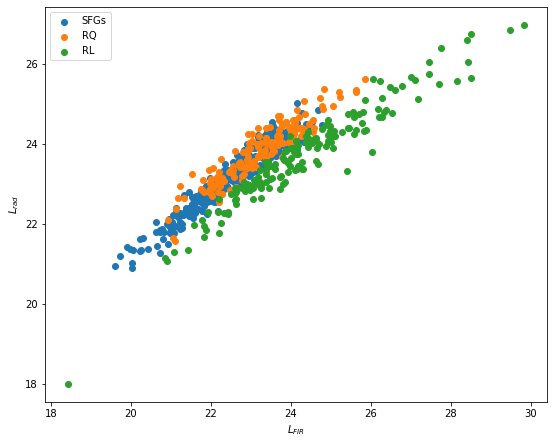

In [6]:
fig = plt.figure(figsize=(9,9))

plt.scatter(LIR[SFG&det], Lr[SFG&det], label="SFGs")
plt.scatter(LIR[RQ&det], Lr[RQ&det], label="RQ")
plt.scatter(LIR[RL&det], Lr[RL&det], label="RL")
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="upper left")
plt.show()

Something is clearly wrong here; the RL AGN don't show radio excess -- they show FIR excess.

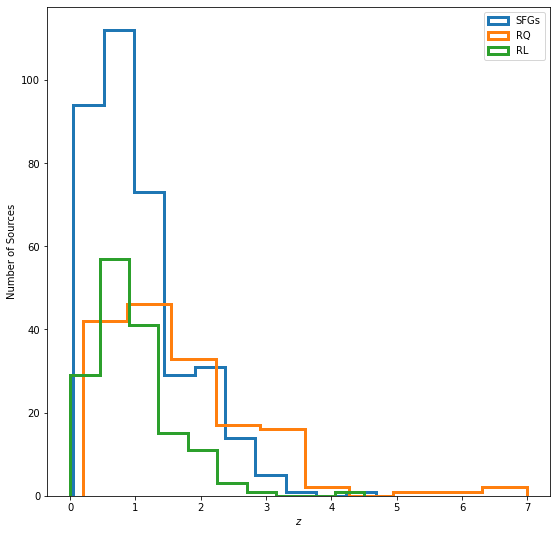

In [7]:
fig = plt.figure(figsize=(9,9))

plt.hist(z[SFG&det], histtype="step", linewidth=3, label="SFGs")
plt.hist(z[RQ&det], histtype="step", linewidth=3, label="RQ")
plt.hist(z[RL&det], histtype="step", linewidth=3, label="RL")
#plt.scatter(LIR[RQ&det], Lr[RQ&det], label="RQ")
#plt.scatter(LIR[RL&det], Lr[RL&det], label="RL")
plt.xlabel("$z$")
plt.ylabel("Number of Sources")
plt.legend(loc="best")
plt.show()

Actually better redshift coverage than I was expecting.

In [8]:
np.sort(z[RQ&det])

array([0.19, 0.2 , 0.21, 0.23, 0.3 , 0.31, 0.47, 0.47, 0.49, 0.49, 0.52,
       0.52, 0.53, 0.53, 0.53, 0.54, 0.57, 0.61, 0.62, 0.64, 0.64, 0.65,
       0.66, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.69, 0.69, 0.72, 0.73,
       0.74, 0.74, 0.76, 0.77, 0.77, 0.81, 0.84, 0.86, 0.86, 0.88, 0.89,
       0.91, 0.91, 0.93, 0.96, 0.96, 0.96, 0.98, 1.01, 1.02, 1.03, 1.03,
       1.04, 1.06, 1.07, 1.08, 1.1 , 1.11, 1.11, 1.12, 1.15, 1.15, 1.16,
       1.16, 1.18, 1.22, 1.27, 1.27, 1.27, 1.32, 1.32, 1.32, 1.35, 1.35,
       1.35, 1.36, 1.37, 1.38, 1.38, 1.38, 1.39, 1.45, 1.51, 1.51, 1.54,
       1.59, 1.6 , 1.61, 1.61, 1.62, 1.62, 1.64, 1.64, 1.64, 1.64, 1.7 ,
       1.77, 1.81, 1.83, 1.84, 1.84, 1.84, 1.91, 1.91, 1.91, 1.94, 1.96,
       1.98, 1.98, 1.98, 1.98, 2.03, 2.06, 2.08, 2.21, 2.21, 2.21, 2.22,
       2.26, 2.3 , 2.3 , 2.3 , 2.32, 2.38, 2.46, 2.46, 2.46, 2.56, 2.58,
       2.64, 2.64, 2.73, 2.73, 2.83, 2.83, 2.91, 2.92, 2.94, 3.02, 3.02,
       3.06, 3.12, 3.16, 3.23, 3.33, 3.34, 3.36, 3.

----

Let me go fetch lower-redshift data.  Start with a Condon+ paper.

In [9]:
dat = Table.read('Yun2001.fit', format='fits')
yrc = dat.to_pandas()
yrc.head()

,IRAS,RAB1950,DEB1950,Offset,S1_4,Mag,Vhel,S60,S100,L_60_,L_1_4_,_RA_icrs,_DE_icrs
0,b'00005+2140',0.148458,21.681778,7.82,28.500000,14.4,6605,4.26,4.510000,10.11,22.420000,0.790057,21.960146
1,b'00014+2028',0.354000,20.474167,6.72,33.900002,12.7,2309,5.16,16.559999,9.28,21.590000,0.995919,20.752527
2,b'00027-1645',0.680333,-16.755472,12.80,31.700001,14.0,7339,2.58,6.590000,9.99,22.559999,1.319567,-16.477076
3,b'00038-1341',0.973500,-13.693806,2.31,29.200001,14.0,5800,2.07,3.670000,9.69,22.320000,1.612669,-13.415442
4,b'00047+2725',1.170958,27.429444,13.30,18.100000,13.4,4534,2.20,6.460000,9.50,21.900000,1.815431,27.707719


In [10]:
FIR_y = yrc[["L_60_"]].values.flatten() #in solar units at 60µm
FIR_y += np.log10(3.916e26 / ( (3.e8)/(60e-6) ))
Lrad_y= yrc[["L_1_4_"]].values.flatten()

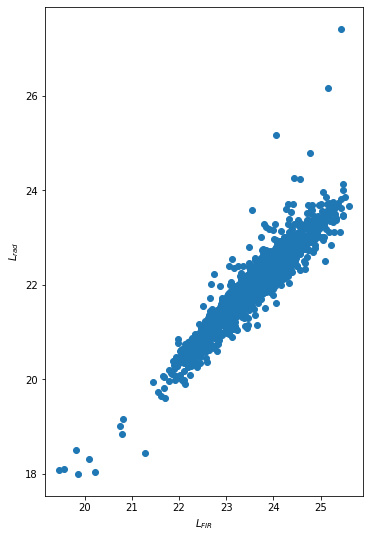

In [11]:
fig = plt.figure(figsize=(9,9))

plt.scatter(FIR_y, Lrad_y)
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.show()

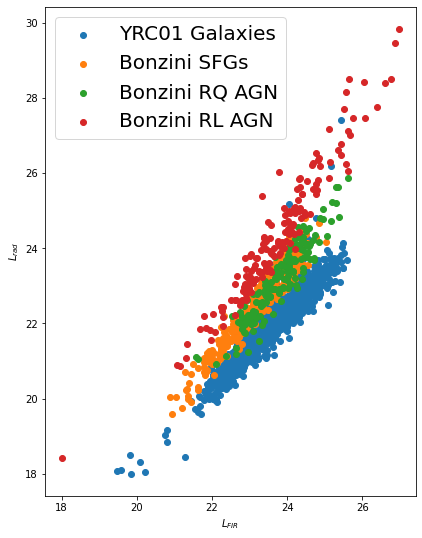

In [12]:
fig = plt.figure(figsize=(9,9))

plt.scatter(FIR_y, Lrad_y, label="YRC01 Galaxies")
plt.scatter(Lr[SFG&det], LIR[SFG&det], label="Bonzini SFGs") #FIR/radio columns are swapped in Bonzini Vizier - should probably contact her about that
plt.scatter(Lr[RQ&det], LIR[RQ&det], label="Bonzini RQ AGN")
plt.scatter(Lr[RL&det], LIR[RL&det], label="Bonzini RL AGN")
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="upper left", prop={"size":20})
plt.show()

Clearly some kinks to work out here.  Get fluxes and compute all on same cosmology.  Don't think the FIR wavelengths are all the same either. 

In [13]:
cosmos = pd.read_csv("COSMOS_VLA3GHz_multiwavelength_Smolcic2017.csv")
cosmos.head()

,id_vla,ra,dec,multi,cat_cpt,id_cpt,ra_cpt_j2000,dec_cpt_j2000,sep_vla_cpt,p_false,...,xray_agn,mir_agn,sed_agn,quiescent_mlagn,sfg,clean_sfg,hlagn,mlagn,radio_excess,flag_cosmos2015
0,8843,149.544367,1.839606,0,COSMOS2015,360940,149.544363,1.839630,0.086,0.0072,...,False,False,False,False,True,True,False,False,False,0
1,8844,150.656764,1.926619,0,COSMOS2015,417132,150.656782,1.926633,0.084,0.0014,...,False,False,False,False,True,True,False,False,False,0
2,8845,150.548591,2.766257,0,COSMOS2015,963009,150.548620,2.766174,0.316,0.0006,...,False,False,False,False,True,True,False,False,False,0
3,8849,150.472998,2.238178,0,COSMOS2015,617489,150.472982,2.238209,0.125,0.0121,...,False,False,False,False,True,False,False,True,True,0
4,8850,149.449541,2.436392,0,COSMOS2015,752001,149.449526,2.436366,0.109,0.0006,...,False,False,False,False,True,True,False,False,False,0


In [14]:
cosmos.columns

Index(['id_vla', 'ra', 'dec', 'multi', 'cat_cpt', 'id_cpt', 'ra_cpt_j2000',
       'dec_cpt_j2000', 'sep_vla_cpt', 'p_false', 'z_best', 'flux_int_3ghz',
       'lradio_10cm', 'lradio_21cm', 'l_tir_sf', 'sfr_kenn98', 'xray_agn',
       'mir_agn', 'sed_agn', 'quiescent_mlagn', 'sfg', 'clean_sfg', 'hlagn',
       'mlagn', 'radio_excess', 'flag_cosmos2015'],
      dtype='object')

In [15]:
z_cos = cosmos[["z_best"]].values.flatten()
L_FIR_cos= cosmos[["l_tir_sf"]].values.flatten()

cosmos = cosmos[(z_cos>-1)&(L_FIR_cos>-1)] #only take objects with known redshifts, FIR available

Lrad_cos = cosmos[["lradio_21cm"]].values.flatten()
L_FIR_cos= cosmos[["l_tir_sf"]].values.flatten()
L_FIR_cos+= np.log10(3.916e26 / ( (3.e8)/(8e-6) ))
z_cos = cosmos[["z_best"]].values.flatten()

AGN_cos = cosmos[["clean_sfg"]].values.flatten()==False
SFG_cos = cosmos[["clean_sfg"]].values.flatten()==True

In [16]:
AGN_cos.sum(), SFG_cos.sum()

(3474, 4675)

In [17]:
(z_cos[SFG_cos]>5).sum()

10

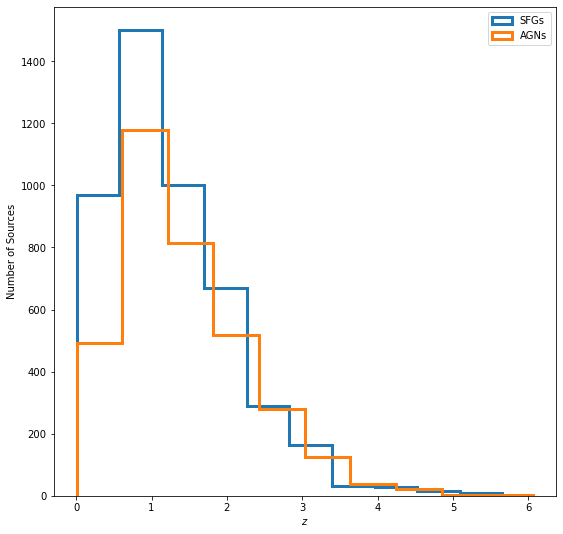

In [18]:
fig = plt.figure(figsize=(9,9))

plt.hist(z_cos[SFG_cos], histtype="step", linewidth=3, label="SFGs")
plt.hist(z_cos[AGN_cos], histtype="step", linewidth=3, label="AGNs")
#plt.scatter(LIR[RQ&det], Lr[RQ&det], label="RQ")
#plt.scatter(LIR[RL&det], Lr[RL&det], label="RL")
plt.xlabel("$z$")
plt.ylabel("Number of Sources")
plt.legend(loc="best")
plt.show()

In [19]:
(z_cos[SFG_cos]>4).sum()

49

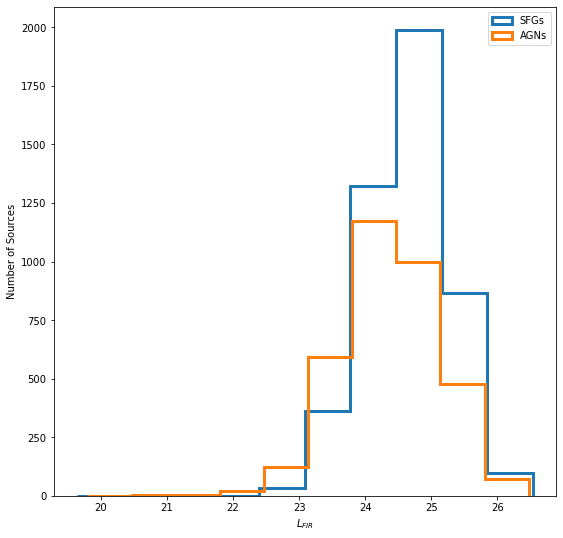

In [20]:
fig = plt.figure(figsize=(9,9))

plt.hist(L_FIR_cos[SFG_cos], histtype="step", linewidth=3, label="SFGs")
plt.hist(L_FIR_cos[AGN_cos], histtype="step", linewidth=3, label="AGNs")
#plt.scatter(LIR[RQ&det], Lr[RQ&det], label="RQ")
#plt.scatter(LIR[RL&det], Lr[RL&det], label="RL")
plt.xlabel("$L_{FIR}$")
plt.ylabel("Number of Sources")
plt.legend(loc="best")
plt.show()

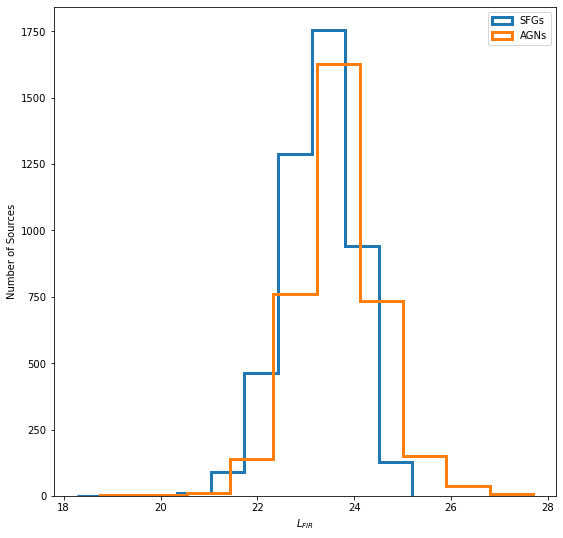

In [21]:
fig = plt.figure(figsize=(9,9))

plt.hist(Lrad_cos[SFG_cos], histtype="step", linewidth=3, label="SFGs")
plt.hist(Lrad_cos[AGN_cos], histtype="step", linewidth=3, label="AGNs")
#plt.scatter(LIR[RQ&det], Lr[RQ&det], label="RQ")
#plt.scatter(LIR[RL&det], Lr[RL&det], label="RL")
plt.xlabel("$L_{FIR}$")
plt.ylabel("Number of Sources")
plt.legend(loc="best")
plt.show()

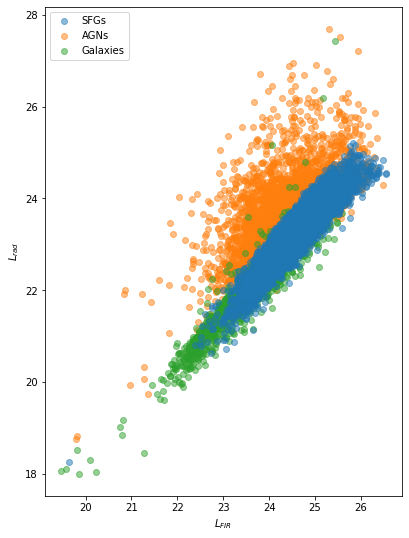

In [22]:
fig = plt.figure(figsize=(9,9))

plt.scatter(L_FIR_cos[SFG_cos], Lrad_cos[SFG_cos], alpha=0.5, label="SFGs", zorder=2)
plt.scatter(L_FIR_cos[AGN_cos], Lrad_cos[AGN_cos], alpha=0.5, label="AGNs")
plt.scatter(FIR_y, Lrad_y, alpha=0.5, label="Galaxies")
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="best")
plt.show()

In [23]:
fit_cos = np.polyfit(L_FIR_cos[SFG_cos], Lrad_cos[SFG_cos], 1)
fit_yrc = np.polyfit(FIR_y, Lrad_y, 1)

In [24]:
yrc = fit_yrc[0]*FIR_y + fit_yrc[1]
cos = fit_cos[0]*L_FIR_cos[SFG_cos] + fit_cos[1]

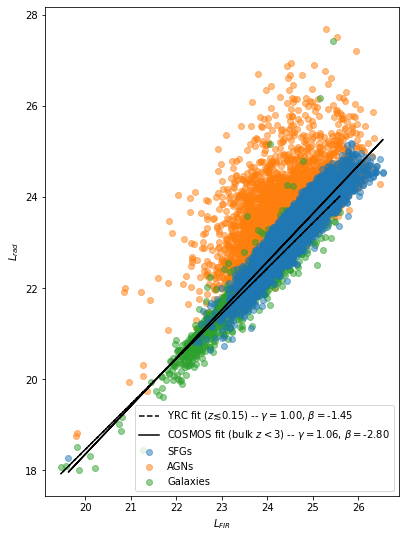

In [25]:
fig = plt.figure(figsize=(9,9))

plt.scatter(L_FIR_cos[SFG_cos], Lrad_cos[SFG_cos], alpha=0.5, 
            label="SFGs", zorder=2)
plt.scatter(L_FIR_cos[AGN_cos], Lrad_cos[AGN_cos], alpha=0.5, 
            label="AGNs")
plt.scatter(FIR_y, Lrad_y, alpha=0.5, label="Galaxies")

plt.plot(FIR_y, yrc, "--k", 
         label="YRC fit ($z\\lesssim0.15$) -- $\gamma=$%.2f, $\\beta=$%.2f" %
                                                    (fit_yrc[0], fit_yrc[1]))
plt.plot(L_FIR_cos[SFG_cos], cos, "-k",
         label="COSMOS fit (bulk $z<3$) -- $\gamma=$%.2f, $\\beta=$%.2f" %
                                                    (fit_cos[0], fit_cos[1]))


plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="best")
plt.show()

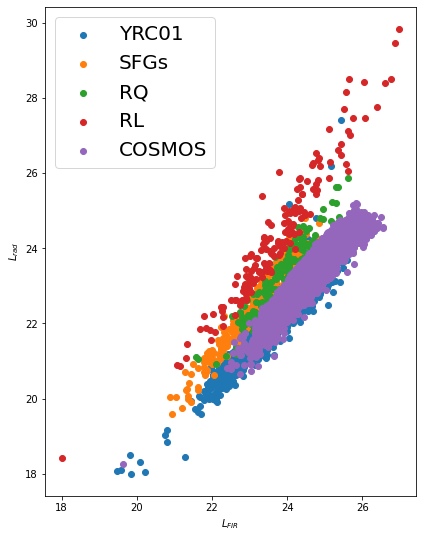

In [26]:
fig = plt.figure(figsize=(9,9))

plt.scatter(FIR_y, Lrad_y, label="YRC01")
plt.scatter(Lr[SFG&det], LIR[SFG&det], label="SFGs") #FIR/radio columns are swapped in Bonzini Vizier - should probably contact her about that
plt.scatter(Lr[RQ&det], LIR[RQ&det], label="RQ")
plt.scatter(Lr[RL&det], LIR[RL&det], label="RL")
plt.scatter(L_FIR_cos[SFG_cos], Lrad_cos[SFG_cos], label="COSMOS")
plt.xlabel("$L_{FIR}$")
plt.ylabel("$L_{rad}$")
plt.gca().set_aspect("equal")
plt.legend(loc="upper left", prop={"size":20})
plt.show()

----

Now do some ``emcee`` stuff; in particular, what is the dispersion, $\delta$, and how does it compare with that of Lusso/Risaliti's reported value for UV/X-ray

In [27]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_disp = theta
    model = m*x + b
    sigma2 = yerr**2 + np.exp(2*log_disp)
    return -1.0 * np.sum( ((y - model)**2 / sigma2) + np.log(sigma2) )

In [28]:
#Combine the COSMOS and YRC data
x = np.concatenate((L_FIR_cos[SFG_cos], FIR_y))
y = np.concatenate((Lrad_cos[SFG_cos], Lrad_y))
yerr = 0*np.ones(len(x)) #don't know the errors (yet!)

In [32]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([fit_cos[0], fit_cos[1], np.log(0.3)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_disp_ml = soln.x

print("Maximum likelihood estimates:")
print("slope = {0:.3f}".format(m_ml))
print("y-int = {0:.3f}".format(b_ml))
print("disp  = {0:.3f}".format(np.exp(log_disp_ml)))

Maximum likelihood estimates:
slope = 1.080
y-int = -3.384
disp  = 0.275


Dispersion not quite as low as I was expecting.  What about just the Smolcic+ data?

In [33]:
nll = lambda *args: -log_likelihood(*args)
initial = np.array([fit_cos[0], fit_cos[1], np.log(0.3)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(L_FIR_cos[SFG_cos], Lrad_cos[SFG_cos], 0.0*np.ones(len(L_FIR_cos[SFG_cos]))))
m_ml, b_ml, log_disp_ml = soln.x

print("Maximum likelihood estimates:")
print("slope = {0:.3f}".format(m_ml))
print("y-int = {0:.3f}".format(b_ml))
print("disp  = {0:.3f}".format(np.exp(log_disp_ml)))

Maximum likelihood estimates:
slope = 1.057
y-int = -2.796
disp  = 0.266


A little better.  I'll leave any further sample cleansing for later, and for now just try to get MCMC running.

In [34]:
def log_prior(theta):
    m, b, log_disp = theta
    if 0.75 < m < 1.5 and -5. < b < 2. and -2 < log_disp < -0.8:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

Need fluxes (and errors) to minimize the RL15 likelihood function!